In [19]:
# Started hacking on this
# For the colors dataset, see: https://goo.gl/FjTazT
# Based on https://github.com/andrewortman/colorbot/

In [2]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow.contrib.keras.python import keras
from tensorflow.contrib.keras.python.keras import preprocessing
from tensorflow.contrib.keras.python.keras.preprocessing.text import Tokenizer
from tensorflow.contrib.keras.python.keras.models import Sequential
from tensorflow.contrib.keras.python.keras.layers import Dense, Dropout, LSTM, Reshape
from tensorflow.contrib.keras.python.keras.optimizers import Adam

import numpy as np
import pandas

In [3]:
print (tf.__version__) # Must be v1.2+

1.2.1


In [4]:
# for this exercise, we won't split the data into train/test
# instead, we'll use a small piece of it as validation data
# as we train the model

# see above for the link to the csv
data = pandas.read_csv('colors.csv')
data

,name,red,green,blue
0,parakeet,174,182,87
1,saddle brown,88,52,1
2,cucumber crush,222,237,215
3,pool blue,134,194,201
4,distance,98,110,130
5,light urple,179,111,246
6,east side,172,145,206
7,florida seashells,250,228,199
8,paris,145,167,189
9,powder blush,247,215,215


In [5]:
names = data["name"]

In [6]:
maxlen = 25
t = Tokenizer(char_level=True)
t.fit_on_texts(names)
tokenized = t.texts_to_sequences(names)
padded_names = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)

In [7]:
# The RGB values are between 0 - 255
# scale them to be between 0 - 1
def norm(value):
    return value / 255.0

normalized_values = np.column_stack([norm(data["red"]), norm(data["green"]), norm(data["blue"])])
#values.shape

In [8]:
model = Sequential()
model.add(Reshape((1, maxlen), input_shape=(maxlen,)))
model.add(LSTM(256, return_sequences=True))
model.add(LSTM(128))
model.add(Dense(128, activation='relu'))
model.add(Dense(3, activation='sigmoid'))
model.compile(optimizer='adam', loss='mse')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 1, 25)             0         
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 256)         288768    
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               197120    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 387       
Total params: 502,787
Trainable params: 502,787
Non-trainable params: 0
_________________________________________________________________


In [9]:
# we're going to massively overfit on the training
# data... that's fine for now
history = model.fit(padded_names, normalized_values,
                    epochs=40,
                    batch_size=32,
                    validation_split=0.1)

Train on 12741 samples, validate on 1416 samples
Epoch 1/40
12741/12741 [==============================] - 8s - loss: 0.0628 - val_loss: 0.0636
Epoch 2/40
12741/12741 [==============================] - 7s - loss: 0.0590 - val_loss: 0.0616
Epoch 3/40
12741/12741 [==============================] - 7s - loss: 0.0571 - val_loss: 0.0590
Epoch 4/40
12741/12741 [==============================] - 7s - loss: 0.0552 - val_loss: 0.0594
Epoch 5/40
12741/12741 [==============================] - 7s - loss: 0.0536 - val_loss: 0.0585
Epoch 6/40
12741/12741 [==============================] - 8s - loss: 0.0520 - val_loss: 0.0583
Epoch 7/40
12741/12741 [==============================] - 9s - loss: 0.0505 - val_loss: 0.0582
Epoch 8/40
12741/12741 [==============================] - 8s - loss: 0.0490 - val_loss: 0.0578
Epoch 9/40
12741/12741 [==============================] - 8s - loss: 0.0473 - val_loss: 0.0582
Epoch 10/40
12741/12741 [==============================] - 8s - loss: 0.0460 - val_loss: 0.0573


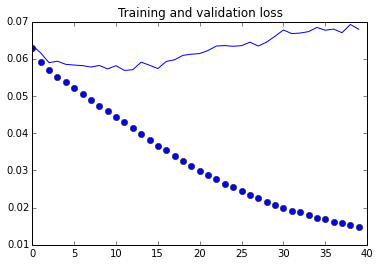

In [10]:
# let's see how badly we've overfit.
import matplotlib.pyplot as plt
%matplotlib inline
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'bo')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.show()

In [11]:
# plots a color image
def plot_rgb(rgb):
    data = [[rgb]]
    plt.figure(figsize=(2,2))
    plt.imshow(data, interpolation='nearest')
    plt.show()

In [12]:
def scale(n):
    return int(n * 255) 

In [13]:
def predict(name):
    tokenized = t.texts_to_sequences([name])
    padded = preprocessing.sequence.pad_sequences(tokenized, maxlen=maxlen)
    pred = model.predict(np.array(padded))[0]
    r, g, b = scale(pred[0]), scale(pred[1]), scale(pred[2])
    print(name + ',', 'R,G,B:', r,g,b)
    plot_rgb(pred)

light blue, R,G,B: 95 158 197


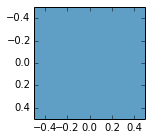

blue, R,G,B: 17 36 173


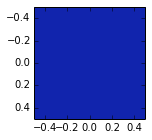

dark blue, R,G,B: 12 23 120


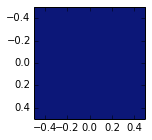

In [15]:
# some "test" data
predict("light blue")
predict("blue")
predict("dark blue")

light red, R,G,B: 226 193 196


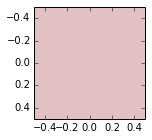

red, R,G,B: 225 32 37


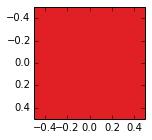

dark red, R,G,B: 151 27 26


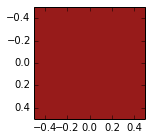

In [16]:
predict("light red")
predict("red")
predict("dark red")

light orange, R,G,B: 236 174 101


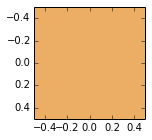

orange, R,G,B: 194 87 65


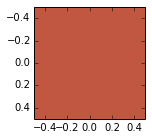

dark orange, R,G,B: 233 115 18


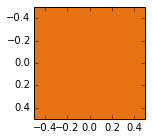

In [17]:
predict("light orange")
predict("orange")
predict("dark orange")

black, R,G,B: 29 32 44


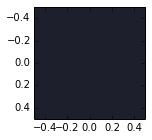

white, R,G,B: 232 242 238


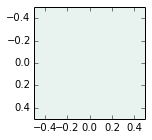

In [18]:
predict("black")
predict("white")

tensorflow orange, R,G,B: 223 94 52


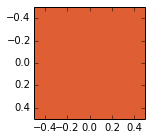

forest, R,G,B: 51 93 68


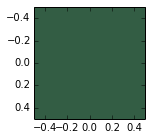

evergreen, R,G,B: 41 99 19


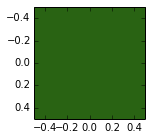

tangerine, R,G,B: 246 128 27


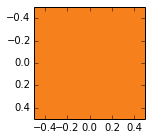

In [20]:
predict("tensorflow orange")
predict("forest")
predict("evergreen")
predict("tangerine")